# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Tismark Boham

**ID**: etb62

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [67]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/4750coding/Homeworks/hw1-TismarkBoham`


Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [68]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

In [69]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [70]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


ERROR:
Here, my colleague has not started the min_value at a valid number. Initializing min_value as 0 will return a min value of 0 if no value in the set is below 0. Instead, We should set the minimum value as the first value in the set, and check all subsequent values against it, replacing with lower values as they come up. This is what I do in the code below.

In [71]:
function minimum(array)
# initialize min value as the first value
    min_value = array[1]
    #check for smaller values through the whole array
    for i in 1:length(array)
        if array[i] < min_value
            #if the value is smaller, replace it
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [72]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

UndefVarError: UndefVarError: `average_grade` not defined

ERRORS: 
1. The function is not called here, because @show has to be followed by the function call. In this case, the function "class_average" should be called, containing the name of the vector "student_grades". Below, I call the function correctly.
2. The mean function does not call the correct vector name. Because we save the input of class_average as 'grades', we need to used the vector name 'grades' not 'student_grades'. Below I correct this error.
3. The mean function is undefined here, so lets compute it manually. I did this by summing all of the grades and dividing by the total number of grades.

In [73]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]

function class_average(grades)
  #solve the mean manually with a for loop
  sum = 0;
  for i in 1:length(grades)
    sum = sum + grades[i]
  end
  #the mean is totalSum/totalEvents
    average_grade = sum/(length(grades))
  return average_grade
end
#show function returns the result of the function you are asking to show
@show class_average(student_grades);

class_average(student_grades) = 94.4


#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

In [74]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zero(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

MethodError: MethodError: no method matching setindex!(::Int64, ::Bool, ::Int64)

ERROR:
 I looked up what the function MethodError meant and it had to do with initializing the vector with zeros. At Reference #1, I found that making zeros, one has to write "zeros()" not "zero()" and that seems to have fixed the code!

In [75]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
#WRITE ZEROS
outcomes = zeros(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.382


### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [76]:
#output the values of a list with no repeats
function mystery_function(values)
    y = []
    #check the entirety of the input vector, checking if the current value has been recorded in our new list
    for v in values
        #if the current value isn't in our new list yet, add it
        if !(v in y)
            append!(y, v)
        end
    end
    #output the new, non-repeating list
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.

Purpose: The purpose of the mystery function is to make a non repeating list of all of the values in the given list.
There is a julia function that does this job, and its called "unique()". It takes in a vector and outputs all values only one time. 

In [77]:
#Use function unique to achieve the same result
list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show unique(list_of_values);

unique(list_of_values) = [1, 2, 3, 4]




### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.



I Split Problems 3 and 4 here so I could code in betweem


In [78]:
function compute_mean(v)
    sum = 0;
    #sum the components
    for i in 1:length(v)
        sum = sum + v[i]
    end
    #divide by number of components and output the value
    return sum/length(v)
end


#make the random vector  of values between -100 and 100 code from Ref [3]
 @show random_vect = rand(-100:100,10) 

#find the mean of the vector
 @show thisMean = compute_mean(random_vect)

#broadcast to subtract (code from Ref [4])
 @show newVect = random_vect .- thisMean 

#calculate to check as 0
newMean = compute_mean(newVect)


random_vect = rand(-100:100, 10) = [-50, -38, -81, -49, 82, -52, -47, 75, 88, -49]
thisMean = compute_mean(random_vect) = -12.1
newVect = random_vect .- thisMean = [-37.9, -25.9, -68.9, -36.9, 94.1, -39.9, -34.9, 87.1, 100.1, -36.9]


-2.1316282072803005e-15

In my code, I started by summing all values in v, and then divided by the total number of entries in v to get the mean. Then I created a random vector of values between -100 and 100. I solved the mean of this random list by calling my function. Then I subtracted the mean from all entries by broadcasting a subtraction of the mean. Finally, I used my function to find the mean of this new vector. Its very near zero, meaning the function successfully finds the mean.

### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

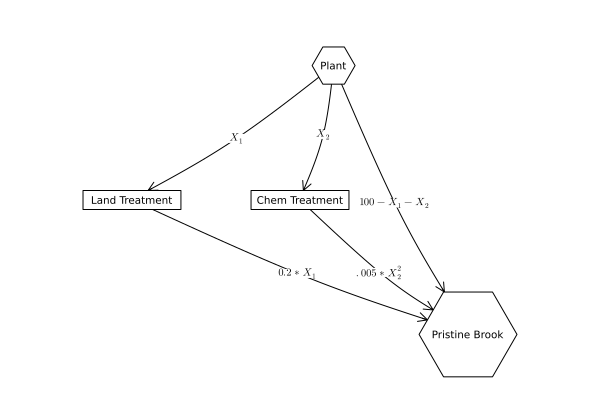

In [79]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
#for method 2, 1-.005X2 gives %removed. Percent remaining is thus .005*X2. percent remaining times total quantity gives total remaining.
edge_labels = Dict((1, 2) => L"X_1", (1,3) => L"X_2", (1, 4) => L"100-X_1-X_2",(2, 4) => L"0.2*X_1",(3, 4) => L".005*X_2^2")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?\
I moved problem 5 statement down


TERMS: 
$X_0 (m^3)$ Is the amount of wastewater discharged into the brook directly\
$X_1 (m^3)$ Is the amount of wastewater discharged into the land\
$X_2 (m^3)$ Is the amount of wastewater treated chemically

CONSTRAINTS: 
$X_0+X_1+X_2 = 100$\
$0 \leq X_0 \leq 100$\
$0 \leq X_1 \leq 100$ \
$0 \leq X_2 \leq 100$

EQUATIONS:

YUK  $(kg) = X_0+.2*X_1+.005*X_2^2$\
YUK Derivation:\
$\rightarrow$ YUK from $X_0$ $(kg)$ = $X_0(m^3)*1(kg/m^3) = X_0$\
$\rightarrow$ YUK from $X_1$ $(kg)$ = $X_1(m^3)*1(kg/m^3)*0.2 = .2*X_1$   (because 20% of the YUK still reaches the water)

For $X_2$, 0.005*X_2 is the % of YUK remaining in the treated X_2. This percentage should be multiplied by the original amount of X_2 to get final YUK.\
$\rightarrow.005*X_2$ = %\
$\rightarrow.005*X_2*X_2(m^3)*1(kg/m^3)$ = $kg$ YUK\

COST 
$(\$)$ = $(X_2*1.5)+ ((X_1^2)/20)$

COST Derivation:\
$\rightarrow$ Cost from $X_0 = 0$\
$\rightarrow$ Cost from $X_2 = X_2(m^3)*\$1.5(1/m^3)$\
$\rightarrow$ Cost from $X_1 = (X_1^2)/20 $  (given)







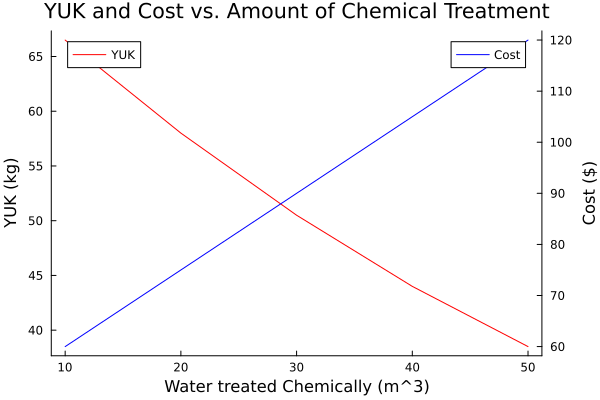

In [80]:
#create the main function to be used
function optimizeYUK(x0,x1,x2)
#return errors if inputs are not valid
    if 0>x0 || x0>100 
        return "error x0 is out of valid range 0-100"  
    elseif 0>x1 || x1>100 
        return "error x1 is out of valid range 0-100" 
    elseif 0>x2 || x2>100
        return "error x2 is out of valid range 0-100" 
    end
#check that the sum of the values is 100
    if x0 + x1 + x2 != 100
        return "error inputs do not sum to 100"  
    end
#calculate the YUK
    YUK = x0 + .2*x1 + .005*(x2^2);
#calculate cost 
    COST = ((x1^2)/20)+ (x2*1.5);
    return (YUK,COST) 
end

#implement the function with different combinations to visualize the effects of each

#make vectors for the different plans
#PLAN 1: vary "chemical treatment" alongside "no treatment", set "ground treatment" to 30

#initialize our vectors
    x0vec = zeros(5)
    x1vec = zeros(5)
    x2vec = zeros(5)
for i in 1:5
    #compute the amount of water going through each method
    noTreat = 70 - i*10;
    groundTreat = 30;
    chemTreat = i*10;
    #save the values into vectors
    x0vec[i] = noTreat
    x1vec[i] = groundTreat
    x2vec[i] = chemTreat
end
#now we can broadcast our vectors into the function
output = optimizeYUK.(x0vec,x1vec,x2vec)
#save output into separate vectors, reference above message
a = [out[1] for out in output]
b = [out[2] for out in output]


#now plot these two lines on the same graph for visualization

#plotting 


#horizontal line at 20%


plot(10:10:50,a,title = "YUK and Cost vs. Amount of Chemical Treatment",label = "YUK", ylabel = "YUK (kg)",color = :red, 
legend = :topleft, grid = :off, xlabel = "Water treated Chemically (m^3)",)
plot!(twinx(),10:10:50,b,label = "Cost", ylabel = "Cost (\$)",color = :blue, 
legend = :topright, grid = :off)





To make this graph I took a few steps: 
1. make a function that calculated the tuple (YUK,Cost) based on input values for amount of water ($m^3$) passed through each treatment method. This function first verifies that the input ratios of water are within the valid range of 0-100, and that they together sum to 100. If not, the code stops and returns an error.
2. Run a loop that creates multiple vectors, representing amounts of water passed through each treatment method. This allows me to have many different combinations of treatment ratios to try. 
3. Pass these vectors through the function using broadcasting, which will provide (YUK,Cost) tuples for each of the treatment plans.
4. Plot the resulting vectors against eachother to demonstrate how the independent variable (amount of water passed through a given treatment plan) effects the dependent variables (YUK and Cost)

Here I have calculated a plan where ground water treatment is held constant, while chemical treatment and no treatment are inversely varied. It is clear that more chemical treatment causes lower YUK value for the stream, but costs significantly more. Unfortunately, this YUK does not reach the standard. We will need to try again, with both chemical and groundwater treatments varying while holding no treatment steady.

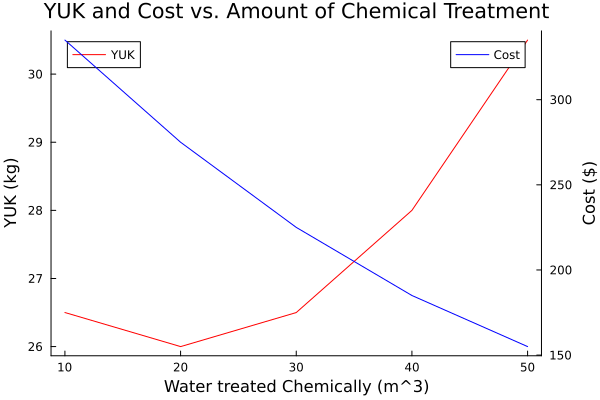

In [81]:
#PLAN 2
#hold notreatment at 10
#initialize our vectors
x0vec = zeros(5)
x1vec = zeros(5)
x2vec = zeros(5)
for i in 1:5
#compute the amount of water going through each method
noTreat = 10;
groundTreat = 90-i*10;
chemTreat = i*10;
#save the values into vectors
x0vec[i] = noTreat
x1vec[i] = groundTreat
x2vec[i] = chemTreat
end
#now we can broadcast our vectors into the function
output = optimizeYUK.(x0vec,x1vec,x2vec)
#save output into separate vectors, reference above message
a = [out[1] for out in output]
b = [out[2] for out in output]


#now plot these two lines on the same graph for visualization

#plotting 
plot(10:10:50,a,title = "YUK and Cost vs. Amount of Chemical Treatment",label = "YUK", ylabel = "YUK (kg)",color = :red, 
legend = :topleft, grid = :off, xlabel = "Water treated Chemically (m^3)",)
plot!(twinx(),10:10:50,b,label = "Cost", ylabel = "Cost (\$)",color = :blue, 
legend = :topright, grid = :off)


I used the same code as above, but held untreated water at $10 m^3$ and varied amounts of chemical treatment and ground treatment for the remaining $90 m^3$. It's cool to see here that the YUK initially dips; we seem to be getting closer to an optimal YUK. unfortunately, the value is still not below 20kg. Lets hold "no treatment" to 0.

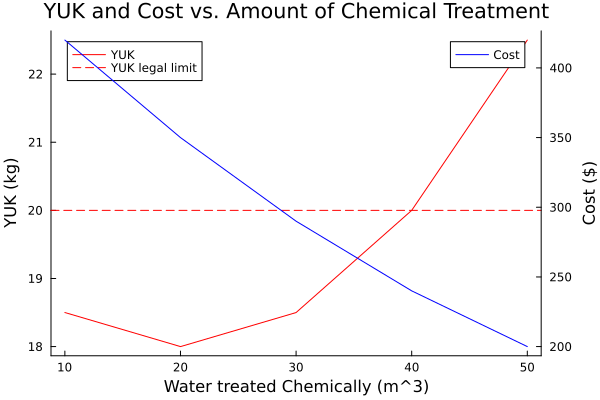

In [82]:
#PLAN 3
#hold notreatment at 0
#majority ground treatment
#initialize our vectors
x0vec = zeros(5)
x1vec = zeros(5)
x2vec = zeros(5)
for i in 1:5
#compute the amount of water going through each method
noTreat = 0;
groundTreat = 100-i*10;
chemTreat = i*10;
#save the values into vectors
x0vec[i] = noTreat
x1vec[i] = groundTreat
x2vec[i] = chemTreat
end
#now we can broadcast our vectors into the function
output = optimizeYUK.(x0vec,x1vec,x2vec)
#save output into separate vectors, reference above message
a = [out[1] for out in output]
b = [out[2] for out in output]


#now plot these two lines on the same graph for visualization

#plotting 
plot(10:10:50,a,title = "YUK and Cost vs. Amount of Chemical Treatment",label = "YUK", ylabel = "YUK (kg)",color = :red, 
legend = :topleft, grid = :off, xlabel = "Water treated Chemically (m^3)",)
plot!(twinx(),10:10:50,b,label = "Cost", ylabel = "Cost (\$)",color = :blue, 
legend = :topright, grid = :off)


#add a horizontal dahsed line
hline!([20], linestyle=:dash, color = :red,label = "YUK legal limit")


Here, I used the same loop but treated all $100 m^3$ of water, through a combination of chemical and ground treatment. I also added a horizontal line at $20kg$ of YUK using the hline function. 

Finally we have found a treatment plan that can meet regulations. It is the expensive option though, compared to other strategies. Lets look at one more plan where the majority of the treatment is done with chemicals, and the substitute is ground treatment.



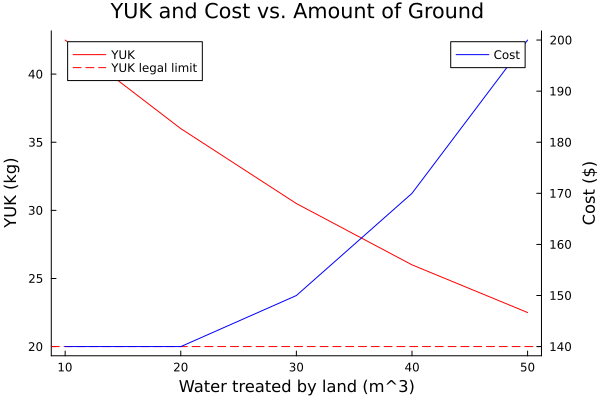

In [83]:
#PLAN 3
#hold notreatment at 0
#majority ground treatment
#initialize our vectors
x0vec = zeros(5)
x1vec = zeros(5)
x2vec = zeros(5)
for i in 1:5
#compute the amount of water going through each method
noTreat = 0;
groundTreat = i*10;
chemTreat = 100 - i*10;
#save the values into vectors
x0vec[i] = noTreat
x1vec[i] = groundTreat
x2vec[i] = chemTreat
end
#now we can broadcast our vectors into the function
output = optimizeYUK.(x0vec,x1vec,x2vec)
#save output into separate vectors, reference above message
a = [out[1] for out in output]
b = [out[2] for out in output]


#now plot these two lines on the same graph for visualization

#plotting 
plot(10:10:50,a,title = "YUK and Cost vs. Amount of Ground",label = "YUK", ylabel = "YUK (kg)",color = :red, 
legend = :topleft, grid = :off, xlabel = "Water treated by land (m^3)",)
plot!(twinx(),10:10:50,b,label = "Cost", ylabel = "Cost (\$)",color = :blue, 
legend = :topright, grid = :off)

#add a horizontal dahsed line
hline!([20], linestyle=:dash, color = :red,label = "YUK legal limit")



It seems that this final method is not great. While greater amounts of chemical treatment is more affordable, it is not helping us reach low enough YUK values. 

### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

## References

List any external references consulted, including classmates.

ONLINE REFERENCES:\
[1] "https://stackoverflow.com/questions/32797691/no-method-matching-setindex-trying-to-change-matrix-values" \
[2] unique function https://discourse.julialang.org/t/unique-indices-method-similar-to-matlab/34446\
[3] #https://stackoverflow.com/questions/72363010/julia-random-array\
[4] #https://docs.julialang.org/en/v1/manual/arrays/#Broadcasting \
[5] linebreak https://stackoverflow.com/questions/33191744/how-to-add-new-line-in-markdown-presentation\
[6] $\leq$ etc. from https://ctan.math.washington.edu/tex-archive/info/undergradmath/undergradmath.pdf\
[7] https://www.pcc.edu/instructional-support/accessibility/mathscience/latex/#:~:text=dollar%20sign%3A%20%5C%24,Ampersand%3A%20%5C%26 dollar sign reference 
[8] or statement #https://www.reddit.com/r/Julia/comments/5clgz3/and_or_statements/\
plotting\
[9]#https://stackoverflow.com/questions/36074207/multiple-axis-with-plots-jl\
[10]#https://discourse.julialang.org/t/how-to-change-values-on-axes/83639/2 \
[11]# https://docs.juliaplots.org/latest/tutorial/\
[12]# https://stackoverflow.com/questions/77865428/is-it-possible-to-add-a-subtitle-by-plots-jl\
[13] horizontal line #https://discourse.julialang.org/t/how-to-specify-the-span-of-hline-in-plots-jl/59539